In [47]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [48]:
# Load the dataset
mal_mem_df = pd.read_csv('data.csv')
mal_mem_df.shape

# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

# Check for duplicate rows based on all columns
duplicates = mal_mem_df[mal_mem_df.duplicated(keep=False)]  # keep=False marks all duplicates
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 1019


In [49]:
duplicates = mal_mem_df[mal_mem_df.duplicated(keep=False)]
print(duplicates.sort_values(by=list(mal_mem_df.columns)))

                                                Category  pslist.nproc  \
8840                                              Benign            39   
18719                                             Benign            39   
25931                                             Benign            39   
1728                                              Benign            39   
6338                                              Benign            39   
...                                                  ...           ...   
40759  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            38   
40760  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   
40761  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   
40762  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   
40763  Spyware-Gator-1cf7f77c2a5f81862bd1c781c3873ab7...            37   

       pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
8840             12           12.974359         

In [50]:
# Get all duplicates (including first occurrences)
duplicates = mal_mem_df[mal_mem_df.duplicated(keep=False)]

# Sort to group identical rows together
duplicates_sorted = duplicates.sort_values(by=list(mal_mem_df.columns))
print(duplicates_sorted.head(20))  # Preview the first 20 duplicates

      Category  pslist.nproc  pslist.nppid  pslist.avg_threads  \
8840    Benign            39            12           12.974359   
18719   Benign            39            12           12.974359   
25931   Benign            39            12           12.974359   
1728    Benign            39            12           12.974359   
6338    Benign            39            12           12.974359   
16895   Benign            39            12           12.974359   
17294   Benign            39            12           12.974359   
1502    Benign            39            12           13.307692   
1505    Benign            39            12           13.307692   
7967    Benign            39            12           13.307692   
12688   Benign            39            12           13.307692   
13127   Benign            39            12           13.307692   
16256   Benign            39            12           13.307692   
21942   Benign            39            12           13.307692   
23397   Be

In [51]:
# Remove all but the first occurrence
df = mal_mem_df.copy()
df = df.drop_duplicates()
print(f"Rows removed: {len(mal_mem_df) - len(df)}")

Rows removed: 534


In [52]:
print(mal_mem_df.shape)
df.shape

(58596, 57)


(58062, 57)

In [53]:
# Separate features and target
y = df["Class"]
X = df.drop(columns=["Category", "Class"])

In [54]:
# Split the category to capture the first word, which signifies the category type
def category(column):
    return column.split("-")[0] if "-" in column else column

In [55]:
# Split the category to capture the second word, which signifies the category name
def category_name(column):
    return column.split("-")[1] if "-" in column else column

In [56]:
# Create new column category to store mawlare type
# Use .loc to avoid the warning
df["category"] = df["Category"].apply(category)

In [57]:
df["category"].value_counts()

category
Benign        29231
Spyware        9815
Ransomware     9529
Trojan         9487
Name: count, dtype: int64

In [58]:
# Creating a column with the names of the variants
df["category_name"] = df["Category"].apply(category_name)
df["category_name"].value_counts()

category_name
Benign          29231
Transponder      2410
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Gator            1995
Conti            1988
Emotet           1967
Zeus             1950
Maze             1754
Pysa             1659
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

In [59]:
# Define the label encoder
def label_encoder(column):
    lencode = LabelEncoder().fit(column)
    print(column.name, lencode.classes_)
    return lencode.transform(column)

In [60]:
df.tail(5)

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,category,category_name
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,24,116,0,120,86,0,8,Malware,Ransomware,Shade
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,24,116,0,116,88,0,8,Malware,Ransomware,Shade
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,24,116,0,120,88,0,8,Malware,Ransomware,Shade
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,24,116,0,120,87,0,8,Malware,Ransomware,Shade
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,24,116,0,120,86,0,8,Malware,Ransomware,Shade


In [61]:
# Drop rows where the category_name is 'Benign'
df = df[df['category_name'] != 'Benign']

# Verify if 'Benign' class has been removed
print(f"Remaining category names in the dataset:\n{df['category_name'].value_counts()}")

Remaining category names in the dataset:
category_name
Transponder     2410
Shade           2128
Ako             2000
180solutions    2000
CWS             2000
Refroso         2000
Scar            2000
Gator           1995
Conti           1988
Emotet          1967
Zeus            1950
Maze            1754
Pysa            1659
Reconyc         1570
TIBS            1410
Name: count, dtype: int64


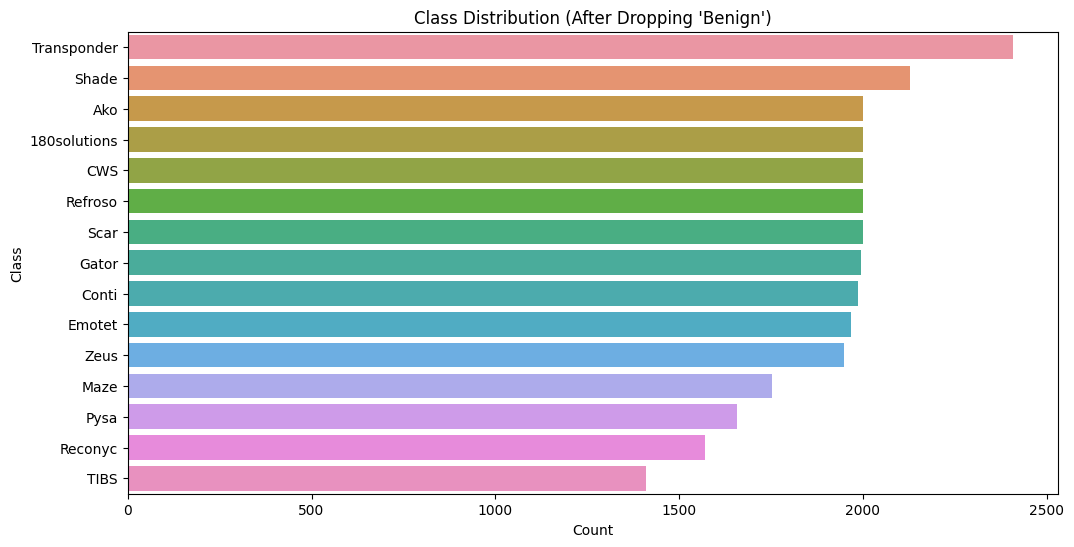

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category_name', order=df['category_name'].value_counts().index)
plt.title("Class Distribution (After Dropping 'Benign')")
plt.xlabel("Count")
plt.ylabel("Class")
plt.show()

In [63]:
# Encoding the columns
# Recommended approach using .loc[]
df['category'] = label_encoder(df['category'])
df['category_name'] = label_encoder(df['category_name'])
df['Class'] = label_encoder(df['Class'])






category ['Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze' 'Pysa'
 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Malware']


In [64]:
# Drop the Category and Class columns
df.drop(["Category", "Class"], axis=1, inplace=True)

In [65]:
df.tail()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name
58591,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,0,...,26,24,116,0,120,86,0,8,0,11
58592,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,0,...,26,24,116,0,116,88,0,8,0,11
58593,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,0,...,26,24,116,0,120,88,0,8,0,11
58594,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,0,...,26,24,116,0,120,87,0,8,0,11
58595,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,0,...,26,24,116,0,120,86,0,8,0,11


In [66]:
# Separate features and target
X = df.drop("category_name", axis=1)
y = df["category_name"]
df.drop(["category"], axis=1, inplace=True)
X.drop(["category"], axis=1, inplace=True)
y.tail(5)

58591    11
58592    11
58593    11
58594    11
58595    11
Name: category_name, dtype: int32

In [67]:
# Split the dataset into training and testing sets, using the usual 80:20 split
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Suppress specific warnings (if you want)
warnings.filterwarnings("ignore", message="Features .* are constant.")
warnings.filterwarnings("ignore", message="invalid value encountered in divide")

# Step 1: Remove constant features
constant_filter = VarianceThreshold(threshold=0.01)
X_filtered = constant_filter.fit_transform(X)


# Handle correlations (on unscaled data for now, but scale later)
corr_matrix = pd.DataFrame(X_filtered).corr().abs()
upper = corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool), k=1))
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]
X_filtered = pd.DataFrame(X_filtered).drop(columns=to_drop).values


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling to test set


# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize individual models
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1,
    objective='multi:softprob',  # Multi-class with probabilities
    random_state=42
)
mlp = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),
    max_iter=1000,
    learning_rate_init=0.0005,
    alpha=0.0001,
    activation='relu',
    solver='adam',
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)

# Create the majority vote classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('mlp', mlp)],
    voting='soft'
)

# Fit the model (using X_resampled, y_resampled, X_test_selected from previous cells)
voting_clf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = voting_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Majority Vote Classifier: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Individual model accuracies
print("\nIndividual Model Accuracies:")
for clf_name, clf in [('Random Forest', rf), ('XGBoost', xgb), ('MLP', mlp)]:
    clf.fit(X_resampled, y_resampled)
    pred = clf.predict(X_test_scaled)
    print(f"{clf_name}: {accuracy_score(y_test, pred):.2f}")

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_clf, X_resampled, y_resampled, cv=cv, scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

# Check test set distribution
print("\nTest set class distribution:\n", y_test.value_counts())

Accuracy of Majority Vote Classifier: 0.52

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.40      0.43       387
           1       0.43      0.34      0.38       408
           2       0.41      0.39      0.40       394
           3       0.47      0.49      0.48       378
           4       0.56      0.52      0.54       378
           5       0.56      0.73      0.63       422
           6       0.51      0.40      0.45       348
           7       0.45      0.34      0.39       329
           8       0.54      0.65      0.59       279
           9       0.69      0.81      0.75       396
          10       0.55      0.58      0.56       416
          11       0.44      0.53      0.48       405
          12       0.85      0.78      0.81       300
          13       0.49      0.47      0.48       500
          14       0.48      0.50      0.49       427

    accuracy                           0.52      5767
   macro avg 